In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_24july.csv', header = 1, index_col = 'Date/Time')
df.head()

,avg,max,min,avg.1,min.1,avg.2,avg.3,min.2,avg.4,max.1,...,max.9,min.9,last.1,last.2,avg.23,max.10,min.10,time.1,Daily ET0 [mm],Unnamed: 54
Date/Time,,,,,,,,,,,,,,,,,,,,,
2023-07-24 20:00:00,22.57,22.68,22.49,22.5,22.4,0,0.00,0.00,99.97,100.00,...,25.5,25.5,0.0,6514,0,0,0,0,NaN,NaN
2023-07-24 19:00:00,22.98,23.48,22.58,22.5,22.3,0,0.07,0.00,97.55,100.00,...,25.6,25.5,0.0,6528,0,1,0,0,NaN,NaN
2023-07-24 18:00:00,23.38,23.66,23.27,22.9,22.6,45,0.07,0.03,97.36,98.83,...,25.5,25.5,1150.0,6559,0,1,0,0,NaN,NaN
2023-07-24 17:00:00,24.01,24.47,23.76,22.9,22.8,74,0.18,0.13,93.75,95.47,...,25.5,25.5,5075.0,6588,1,1,1,0,NaN,NaN
2023-07-24 16:00:00,24.34,24.93,23.93,23.2,23.0,133,0.19,0.07,93.63,97.48,...,25.6,25.5,6849.0,6636,1,1,0,35,NaN,NaN


## Renaming The Columns:

In [3]:
df.columns = [ 'air_temp_avg', 'air_temp_max', 'air_temp_min', 'dew_avg',
       'dew_min', 'solar_rad_avg', 'vpd_avg', 'vpd_min', 'rel_humi_avg',
       'rel_humi_max', 'rel_humi_min', 'precp_sum', 'leaf_wetness_time(min)',
       'wind_speed_avg', 'wind_speed_max', 'wind_gust_max', 'wind_dir_last',
       'eag_sm1_avg', 'eag_sm2_avg', 'eag_sm3_avg', 'eag_sm4_avg',
       'eag_sm5_avg', 'eag_sm6_avg', 'VIC1_avg', 'VIC2_avg', 'VIC3_avg',
       'VIC4_avg', 'VIC5_avg', 'VIC6_avg', 'soil_temp1_avg', 'soil_temp1_max',
       'soil_temp1_min', 'soil_temp2_avg', 'soil_temp2_max', 'soil_temp2_min',
       'soil_temp3_avg', 'soil_temp3_max', 'soil_temp3_min', 'soil_temp4_avg',
       'soil_temp4_max', 'soil_temp4_min', 'soil_temp5_avg', 'soil_temp5_max',
       'soil_temp5_min', 'soil_temp6_avg', 'soil_temp6_max', 'soil_temp6_min',
       'sp_last', 'bat_last', 'del_avg', 'del_max', 'del_min', 'sun_time',
       'Daily ET0 [mm]']

## Reversing and Handling Null Values:

In [4]:
df = df[::-1]
df['Daily ET0 [mm]'].fillna(0, inplace = True)

## Selecting only Average Air Temperature:

In [5]:
df1 = pd.DataFrame(df['air_temp_avg'], index = df.index, columns = ['air_temp_avg'])
df1.head()

,air_temp_avg
Date/Time,
2023-04-25 13:00:00,35.27
2023-04-25 14:00:00,35.97
2023-04-25 15:00:00,36.33
2023-04-25 16:00:00,36.58
2023-04-25 17:00:00,36.27


## Plot of Average Air Temperature:

In [6]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df1.index, y = df1['air_temp_avg'], mode = 'lines+markers'))

fig.update_layout(title = "Average Air Temperature")
fig.update_yaxes(title_text = "Average Air Temperature")
fig.update_xaxes(title_text = "Datetime")

fig.show()

## Components of Time Series:

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

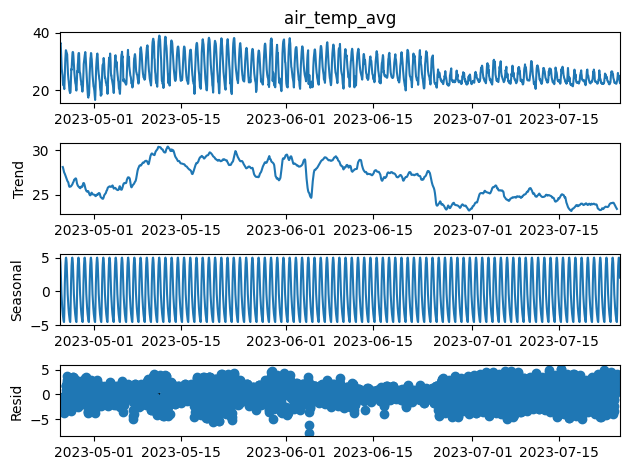

In [8]:
series = df['air_temp_avg']

series.index = pd.date_range(start = df.index[0], periods = len(df1), freq='1H')

decomposition = seasonal_decompose(series, model = 'additive')
decomposition.plot()
plt.show()

## From above results, we can see the data consists of seasonality and there is no particular trend in the data but still irregular trend is present.

## Checking Stationarity:

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

## Dicky Fuller Test:

In [10]:
result = adfuller(df1['air_temp_avg'].values, autolag = 'AIC')

In [11]:
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critial Value at {key} = {value}')

ADF Statistic: -2.103531236738463
p-value: 0.24309704633855367
Critial Value at 1% = -3.4334094211542983
Critial Value at 5% = -2.8628915360971003
Critial Value at 10% = -2.5674894918770197


### From above results, since p-value is greater than 0.05 we can conclude we can not reject the null hypothesis and hence the series is non-stationary.

## Checking with KPSS Test:

In [12]:
result = kpss(df1['air_temp_avg'].values)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

KPSS Statistic: 4.135876194776187
p-value: 0.01


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




## Based on KPSS p-value, we reject Null Hypothesis and hence time series is not stationary.

## Making Time Series Stationary:

## Differencing:

In [13]:
df1['M1'] = df1['air_temp_avg'] - df1['air_temp_avg'].shift(1)

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df1.index, y = df1['M1'], mode = 'lines+markers'))

fig.update_layout(title = "Average Air Temperature (After first order differencing)")
fig.update_yaxes(title_text = "Average Air Temperature")
fig.update_xaxes(title_text = "Datetime")

fig.show()

## ADF Test:

In [15]:
result = adfuller(df1['M1'].dropna().values, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critial Value at {key} = {value}')

ADF Statistic: -14.37845437395727
p-value: 9.239076864027711e-27
Critial Value at 1% = -3.4334094211542983
Critial Value at 5% = -2.8628915360971003
Critial Value at 10% = -2.5674894918770197


## KPSS:

In [16]:
result = kpss(df1['M1'].dropna().values)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

KPSS Statistic: 0.021137170791565157
p-value: 0.1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




## Since the p-value is less than 0.05 in ADF and greater than 0.5 in KPSS test hence we can state the time series is now stationary.

## Hence, the lags value should be atleast 1 to get stationary and accurate results since we get stationary time series after first order differencing.

## Identifying the values of order p and order q by using ACF and PACF:

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

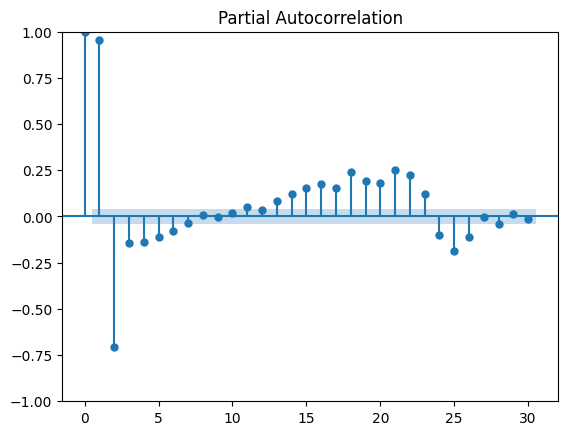

In [18]:
pacf = plot_pacf(df1['air_temp_avg'], lags = 30)

## In case of Autoregression we only consider PACF and for only Moving Average we consider ACF.

## Train and Test Splits:

In [19]:
train = df1['M1'].iloc[:-72]
test = df1['M1'].iloc[-72:]

## AR model:

In [20]:
from statsmodels.tsa.ar_model import AutoReg

## When lags = 23 is considered, we get better results on test data and the forecasts are also good and are closest to the actual values when compared by checking on google.

In [21]:
model = AutoReg(train.dropna(), lags = 23).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                     M1   No. Observations:                 2093
Model:                    AutoReg(23)   Log Likelihood               -2329.381
Method:               Conditional MLE   S.D. of innovations              0.746
Date:                Wed, 26 Jul 2023   AIC                           4708.762
Time:                        04:41:55   BIC                           4849.645
Sample:                            23   HQIC                          4760.401
                                 2093                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.016     -0.659      0.510      -0.043       0.021
M1.L1          0.1731      0.022      7.925      0.000       0.130       0.216
M1.L2         -0.2052      0.022     -9.360      0.000      -0.248      -0.162
M1.L3         -0.1966      0.022     -8.909      0.000      -0.240      -0.153
M1.L4         -0.1916      0.022     -8.702      0.000      -0.235      -0.148
M1.L5         -0.1829      0.022     -8.260      0.000      -0.226      -0.139
M1.L6         -0.1812      0.022     -8.229      0.000      -0.224      -0.138
M1.L7         -0.2397      0.022    -11.048      0.000      -0.282      -0.197
M1.L8         -0.1849      0.022     -8.363      0.000      -0.228      -0.142
M1.L9         -0.2062      0.022     -9.384      0.000      -0.249      -0.163
M1.L10        -0.2263      0.022    -10.316      0.000      -0.269      -0.183
M1.L11        -0.1917      0.022     -8.683      0.000      -0.235      -0.148
M1.L12        -0.1955      0.022     -8.856      0.000      -0.239      -0.152
M1.L13        -0.1921      0.022     -8.695      0.000      -0.235      -0.149
M1.L14        -0.2098      0.022     -9.562      0.000      -0.253      -0.167
M1.L15        -0.2267      0.022    -10.329      0.000      -0.270      -0.184
M1.L16        -0.1605      0.022     -7.252      0.000      -0.204      -0.117
M1.L17        -0.2489      0.022    -11.427      0.000      -0.292      -0.206
M1.L18        -0.2075      0.022     -9.393      0.000      -0.251      -0.164
M1.L19        -0.1555      0.022     -7.007      0.000      -0.199      -0.112
M1.L20        -0.2089      0.022     -9.469      0.000      -0.252      -0.166
M1.L21        -0.1671      0.022     -7.553      0.000      -0.211      -0.124
M1.L22        -0.1494      0.022     -6.805      0.000      -0.192      -0.106
M1.L23         0.1125      0.022      5.153      0.000       0.070       0.155
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0759           -0.1448j            1.0856           -0.4787
AR.2            -1.0759           +0.1448j            1.0856            0.4787
AR.3            -0.9842           -0.4396j            1.0779           -0.4331
AR.4            -0.9842           +0.4396j            1.0779            0.4331
AR.5            -0.8158           -0.7237j            1.0905           -0.3845
AR.6            -0.8158           +0.7237j            1.0905            0.3845
AR.7            -0.6266           -0.9116j            1.1062           -0.3458
AR.8            -0.6266           +0.9116j            1.1062            0.3458
AR.9            -0.3607           -1.0200j            1.0819           -0.3041
AR.10           -0.3607           +1.0200j            1.0819            0.3041
AR

In [22]:
start = len(train)
end = len(train) + len(test) - 1

In [23]:
pred = model.predict(start = start, end = end, dynamic = False)
pred_list = pred.values

last_value = df1.iloc[-73][0]

og_scale_pred = [last_value]
for diff in pred_list:
  og_scale_pred.append(og_scale_pred[-1]+diff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [24]:
pred_df = pd.DataFrame(og_scale_pred, columns = ['Pred'], index = df.index[-73:])
pred_df['Actual'] = df1['air_temp_avg'].iloc[-73:]

In [25]:
pred_df.dropna().head()

,Pred,Actual
Date/Time,,
2023-07-21 20:00:00,22.670000,22.67
2023-07-21 21:00:00,22.735926,22.73
2023-07-21 22:00:00,22.823907,22.29
2023-07-21 23:00:00,22.786572,22.57
2023-07-22 00:00:00,22.771527,22.35


## Plotting Predictions and Actuals:

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = pred_df.index, y = pred_df['Actual'], mode = 'lines+markers', name = 'Actual'))
fig.add_trace(go.Scatter(x = pred_df.index, y = pred_df['Pred'], mode = 'lines+markers', name = 'Predictions'))

fig.update_layout(title = "Average Air Temperature")
fig.update_yaxes(title_text = "Average Air Temperature")
fig.update_xaxes(title_text = "Datetime")

fig.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
print("MSE = ", mean_squared_error(pred_df['Actual'].dropna(), pred_df['Pred'].dropna()))
print("MAE = ", mean_absolute_error(pred_df['Actual'].dropna(), pred_df['Pred'].dropna()))

MSE =  0.6866627714443297
MAE =  0.6098320942813577


## Forecasting:

In [29]:
def future_pred(mod, num_forecasts):

  # Specifying the start and end for forecasts
  strt = len(df1) + 1
  ed = len(df1) + num_forecasts

  # Predicting
  pred_future = mod.predict(start = strt, end = ed, dynamic = False)
  pred_values = pred_future.values

  #rescaling:
  last_val = df1.iloc[-1][0]
  forecast_list = [last_val]

  for f in pred_values:
    forecast_list.append(forecast_list[-1]+f)

  # Setting new index
  index_future_pred = pd.date_range(start = df1.index[-1], periods = num_forecasts, freq = '1H')

  # Creating dataframe for forecasts
  forecast_df = pd.DataFrame(forecast_list[1:], index = index_future_pred, columns = ['Forecasts'])

  return forecast_df

In [30]:
num_forecasts = 72  # 3 day forecasts
forecast_df = future_pred(model, num_forecasts)
forecast_df.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,Forecasts
2023-07-24 20:00:00,22.487982
2023-07-24 21:00:00,22.433806
2023-07-24 22:00:00,22.405514
2023-07-24 23:00:00,22.398201
2023-07-25 00:00:00,22.418954


## Plotting Forecasts:

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = forecast_df.index, y = forecast_df['Forecasts'], mode = 'lines+markers', line=dict(color="#f4b916")))

fig.update_layout(title = "Average Air Temperature Forecasts")
fig.update_yaxes(title_text = "Average Air Temperature")
fig.update_xaxes(title_text = "Future Datetime")

fig.show()